In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [ ]:
data = pd.read_csv("drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
data.shape

(200, 6)

# Visualizations


<Axes: xlabel='Age', ylabel='Count'>

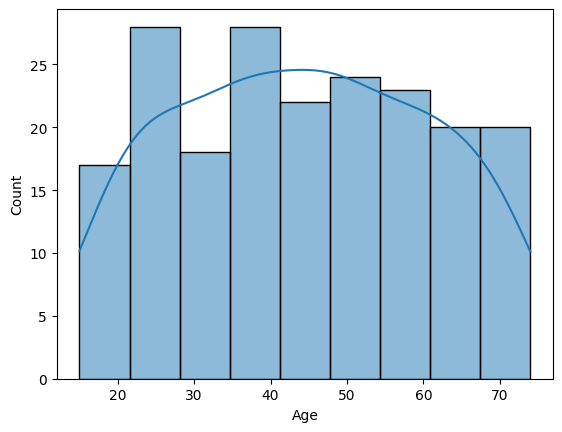

In [ ]:
sns.histplot(data['Age'],kde=True)

**Observations**:

The dataset has individuals spanning a wide age range (from ~10 to 75 years old).

The most frequent age groups appear to be in their 30s and 40s, as indicated by taller bars.

The distribution is fairly uniform with slight peaks around ages 30-40 and 50-60.



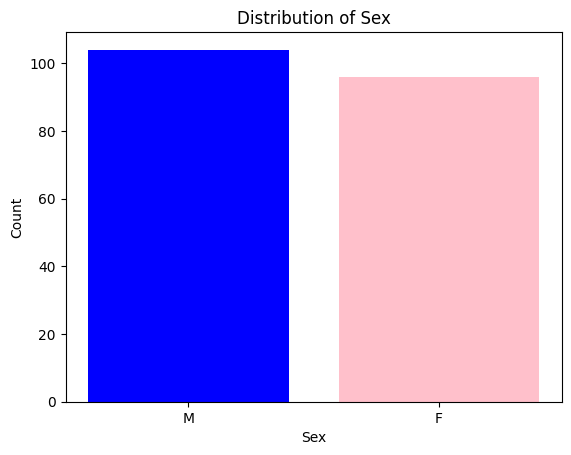

In [ ]:
# Count occurrences of each category
sex_counts = data['Sex'].value_counts()

# Plot
plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.show()

**Observations**:

The dataset has slightly more males than females.

The difference in count is small, meaning the dataset has a relatively balanced gender distribution.

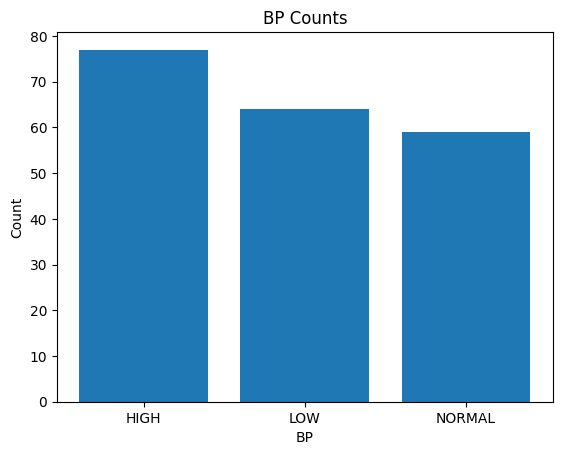

In [ ]:
# Count occurrences of each category
bp_counts = data['BP'].value_counts()

# Plot
plt.bar(bp_counts.index, bp_counts.values)
plt.xlabel("BP")
plt.ylabel("Count")
plt.title("BP Counts")
plt.show()

**Observations**:

HIGH BP is the most common condition, followed by LOW BP and then NORMAL BP.

The relatively low count of NORMAL BP cases suggests that most individuals in this dataset have some BP abnormality (either high or low).

This could indicate a population with higher risk factors for cardiovascular diseases, requiring further investigation.



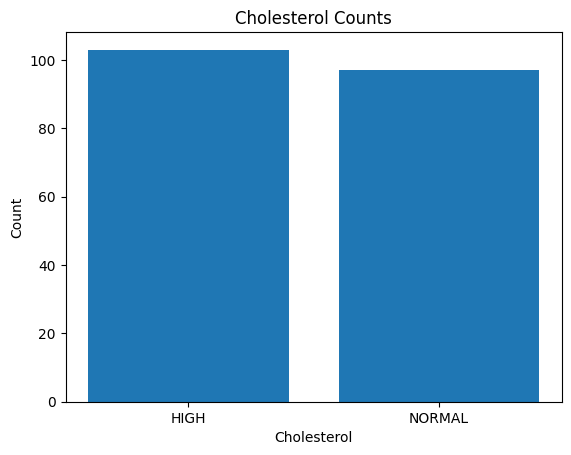

In [ ]:
cholestrol_counts = data['Cholesterol'].value_counts()

plt.bar(cholestrol_counts.index, cholestrol_counts.values)
plt.xlabel("Cholesterol")
plt.ylabel("Count")
plt.title("Cholesterol Counts")
plt.show()

**Observations**:

The number of individuals with HIGH cholesterol is slightly greater than those with NORMAL cholesterol.

The difference is not very large, suggesting a relatively balanced dataset.




<Axes: xlabel='BP', ylabel='Age'>

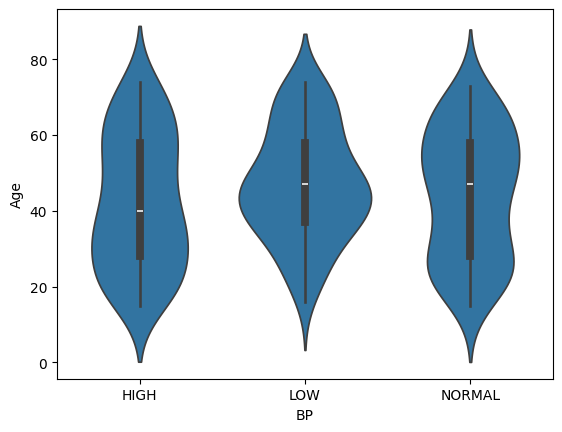

In [ ]:
#plot to show the relationship between Age and BP
sns.violinplot(x=data['BP'],y=data['Age'],data=data)

**Observations**:

The age distributions for HIGH, LOW, and NORMAL BP groups are quite similar.

Median Age:
The median age for all BP groups is around 40-50 years.

Spread:
The distributions range approximately from 18 to 75+ years across all BP groups.

A slightly broader spread for LOW BP is visible, suggesting more variance in age distribution for individuals with low BP.

Density:
All groups have a similar density across ages, but younger individuals seem to be fewer in the HIGH BP group compared to older individuals.

**Insights**:

BP levels appear to be somewhat age-independent in this dataset.

Older individuals tend to have a slightly higher density in the HIGH BP category, but the difference isn't significant.

LOW BP has a slightly wider distribution, meaning it occurs in individuals across a broader range of ages.

<Axes: xlabel='Cholesterol', ylabel='BP'>

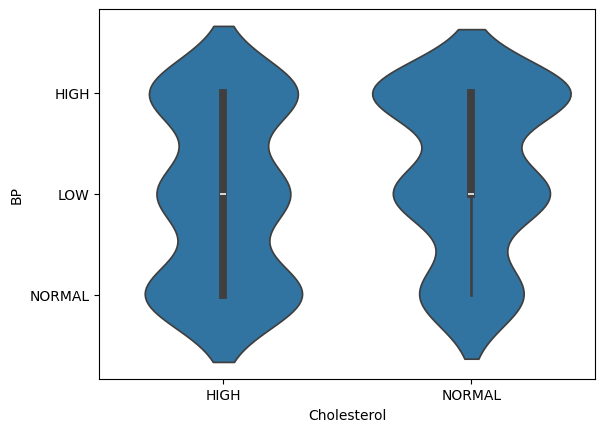

In [ ]:
sns.violinplot(x=data['Cholesterol'],y=data['BP'],data=data)

**Observations**:

The BP distribution for both HIGH and NORMAL cholesterol groups is quite similar.

The median BP level (white dot) is around the LOW BP range for both cholesterol groups.

Both groups have a similar spread across NORMAL, LOW, and HIGH BP levels.

The density distribution does not indicate a strong correlation between cholesterol levels and blood pressure.



<Axes: xlabel='Sex', ylabel='BP'>

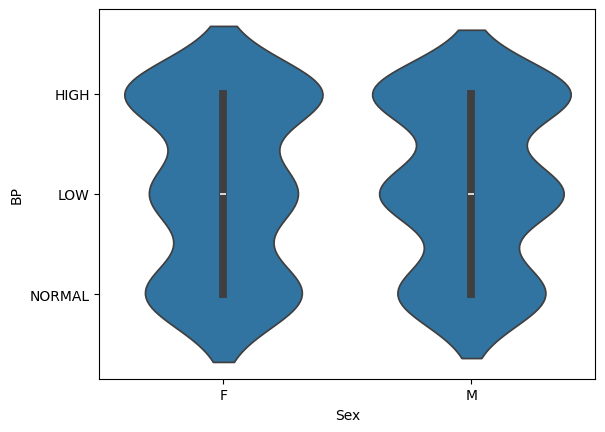

In [ ]:
sns.violinplot(x=data['Sex'],y=data['BP'],data=data)

**Observations**:

The blood pressure distribution is quite similar for both males and females.

The median BP level (white dot) is close to the LOW BP range for both sexes.

The spread of BP values is almost identical for both males and females, suggesting no major gender difference in BP distribution.

Both males and females have individuals across NORMAL, LOW, and HIGH BP levels, with more density in the LOW to HIGH range.

**Insights**:

Since both distributions are similar, sex alone may not be a strong determinant of blood pressure levels.

Further analysis could explore factors like age, lifestyle, diet, or medical history to understand variations in blood pressure.

If the dataset contained additional health indicators (e.g., BMI, cholesterol, smoking habits), a deeper analysis could reveal more insights.

<Axes: xlabel='Sex', ylabel='Cholesterol'>

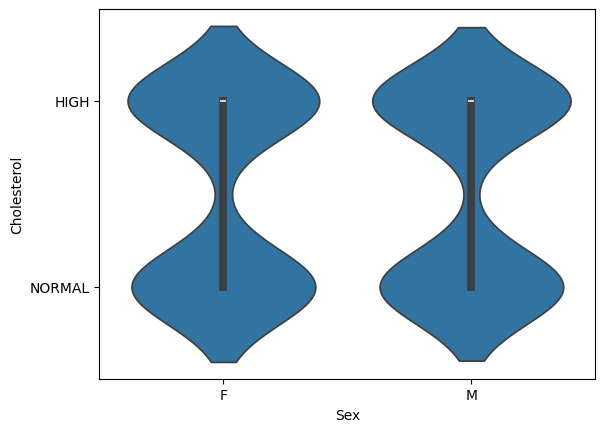

In [ ]:
sns.violinplot(x=data['Sex'],y=data['Cholesterol'],data=data)

**Observations**:

The cholesterol distribution is similar for both males and females.

The median cholesterol level (white dot) is almost the same for both genders.

The shape of the violins suggests that there is a significant concentration of individuals at both NORMAL and HIGH cholesterol levels for both sexes.

The spread of cholesterol values is almost identical for males and females, meaning there is no major difference between the cholesterol levels of men and women in this dataset.

**Insights**:

The similarity in cholesterol distribution for both sexes suggests that gender alone may not be a strong factor in determining cholesterol levels.

<Axes: xlabel='Cholesterol', ylabel='Age'>

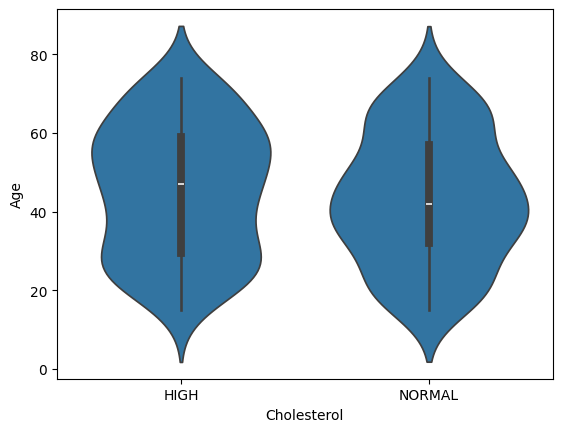

In [ ]:
sns.violinplot(x=data['Cholesterol'],y=data['Age'],data=data)

**Observation**:

The age distribution is similar for both HIGH and NORMAL cholesterol groups.

The median age (white dot) is around 40-50 years for both categories.

The distribution shows that younger individuals (below 20) are less common in both groups.

The age range is spread out from approximately 15 to 80 years, with more individuals between 30 to 60 years in both categories.

Both cholesterol groups have a similar shape, indicating that cholesterol levels may not be heavily skewed toward any specific age group.

**Insights**:

Since the distributions are similar, age alone may not be a strong predictor of cholesterol level.

If one category (e.g., HIGH cholesterol) had a higher concentration of older individuals, it would suggest that age plays a role in cholesterol levels.

# EDA

In [ ]:
#checking if the data contains any null values
data.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Seems already sorted. The data has no null values!

In [ ]:
#checking if the data contains any duplicate values
data.duplicated().sum()

np.int64(0)

Data has 0 duplicates too!

In [ ]:
#checking the datatype of various dimensions
data.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,float64
Drug,object


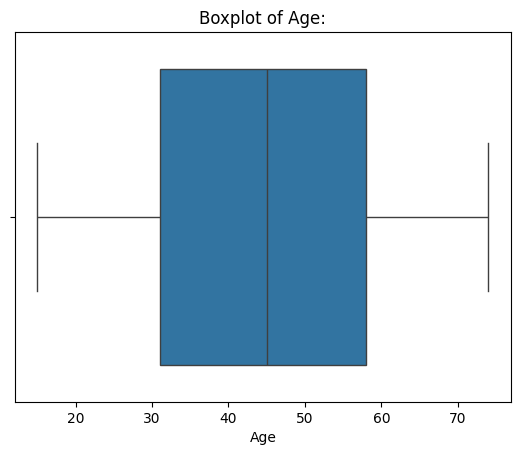

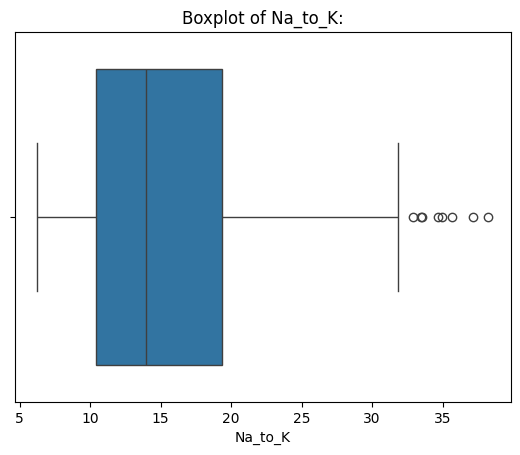

In [ ]:
#checking if there's any outlier in the data
num = data.select_dtypes(include=['int64','float64']).columns

for i in num:
  sns.boxplot(x=data[i])
  plt.title(f"Boxplot of {i}:")
  plt.show()

Got some outliers in the column Na_to_K. Removing them using the IQR method.

In [ ]:
col = "Na_to_K"

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply filtering: Remove outliers while keeping the same DataFrame name
data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(data.shape)
print(data.describe())  # Summary statistics

(192, 6)
              Age     Na_to_K
count  192.000000  192.000000
mean    44.395833   15.292656
std     16.558941    6.203717
min     15.000000    6.269000
25%     31.000000   10.433000
50%     44.000000   13.683500
75%     58.000000   19.008000
max     74.000000   31.876000


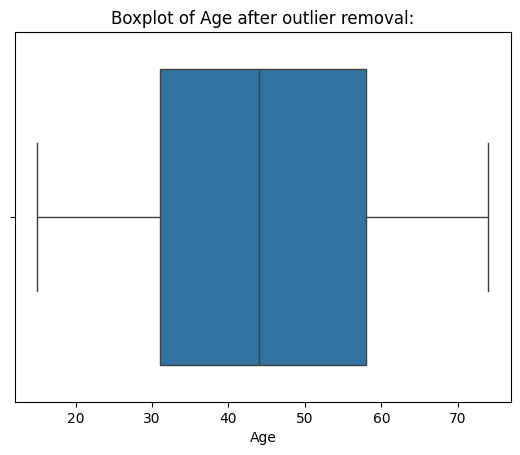

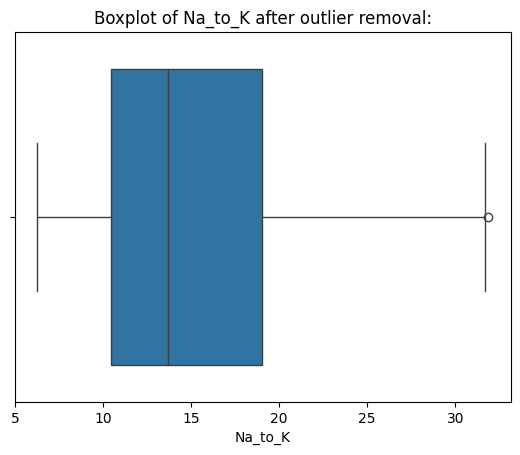

In [ ]:
#checking again using boxplot
for i in num:
  sns.boxplot(x=data[i])
  plt.title(f"Boxplot of {i} after outlier removal:")
  plt.show()

Proceeding to split the data into training and testing sets.

In [ ]:
#splitting to data into independent and dependent dimensions
X=data.iloc[:,0:5]
y=data.iloc[:,5:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
print("Independent dimensions are:", X.columns)
print("Target dimension is:", y.columns)

(153, 5) (39, 5) (153, 1) (39, 1)
Independent dimensions are: Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')
Target dimension is: Index(['Drug'], dtype='object')


Applying column transformer to standardize and encode dimensions as required

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define transformations
transformer = ColumnTransformer([
    ('num', StandardScaler(),['Age', 'Na_to_K']),   # Scaling numerical columns
    ('cat', OneHotEncoder(drop='first'), ['Sex', 'BP', 'Cholesterol'])  # Encoding categorical columns
], remainder='passthrough')  # Keep other columns as is (if any)

# Apply transformation to training & test sets
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

# Convert back to DataFrame
X_train = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())
X_test = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())

print(X_train.shape, X_test.shape)
print("Transformed feature names:", X_train.columns)


(153, 6) (39, 6)
Transformed feature names: Index(['num__Age', 'num__Na_to_K', 'cat__Sex_M', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_NORMAL'],
      dtype='object')


In [ ]:
# Remove the 'num__' and 'cat__' prefixes
X_train.columns = X_train.columns.str.replace(r'^(num__|cat__)', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'^(num__|cat__)', '', regex=True)

# Print transformed feature names
print("Updated feature names:", X_train.columns)


Updated feature names: Index(['Age', 'Na_to_K', 'Sex_M', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_NORMAL'], dtype='object')


In [ ]:
X_train.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,-0.477416,-0.675449,0.0,0.0,0.0,1.0
1,-0.664869,-1.017154,1.0,1.0,0.0,1.0
2,0.709793,-0.217411,0.0,0.0,1.0,0.0
3,-0.852323,-0.973570,1.0,0.0,0.0,1.0
4,0.209916,-1.476936,1.0,0.0,0.0,1.0


In [ ]:
X_test.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,-0.539900,-0.395713,0.0,0.0,0.0,0.0
1,1.147186,1.609194,0.0,1.0,0.0,1.0
2,-1.227231,0.566325,0.0,0.0,0.0,1.0
3,0.959732,-1.307192,0.0,1.0,0.0,1.0
4,1.334640,-0.962634,1.0,0.0,1.0,1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Apply label encoding to y_train and y_test
y_train = le.fit_transform(y_train.values.ravel())  # Convert to 1D array if needed
y_test = le.transform(y_test.values.ravel())  # Use transform (not fit_transform) to keep consistency

# Check the encoded classes
print("Encoded classes:", le.classes_)
print("y_train sample:", y_train[:5])


Encoded classes: ['DrugY' 'drugA' 'drugB' 'drugC' 'drugX']
y_train sample: [1 4 4 1 1]


# Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

#evaluation
from sklearn.metrics import accuracy_score,classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



Tuning the hyperparameters using RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize random search
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters & accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# Train best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40}
Best Accuracy: 0.9935483870967742


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_ = RandomForestClassifier(random_state=42,
                               n_estimators=150,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features='log2',
                               max_depth=40)
model_.fit(X_train,y_train)

#evaluation
from sklearn.metrics import accuracy_score,classification_report
y_pred = model_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



Since RandomizedSearchCV is giving the same result, trying to tune the parameters using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Evaluate
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.9743589743589743
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      1.00      0.94         8
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        13

    accuracy                           0.97        39
   macro avg       0.98      0.93      0.95        39
weighted avg       0.98      0.97      0.97        39



Model accuracy seems to be same again, even after tuning the hyperparameters, so considering the same RandomForest model and moving on with deployment.

In [ ]:
import pickle

In [ ]:
with open('drug.pkl','wb') as file:
  pickle.dump(model,file)